In [ ]:
!nvidia-smi

Mon Apr 22 03:39:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.1/78.2 GB disk)


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="07bClDQVmhIQQLjfa5K5")
project = rf.workspace("ambulancedetection").project("final-year-project-m100k")
dataset = project.version(1).download("yolov8")



/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Final-Year-Project-1 in yolov8:: 100%|██████████| 4050/4050 [00:00<00:00, 5708.01it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=20 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 221MB/s]
New https://pypi.org/project/ultralytics/8.1.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Final-Year-Project-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buff

/content


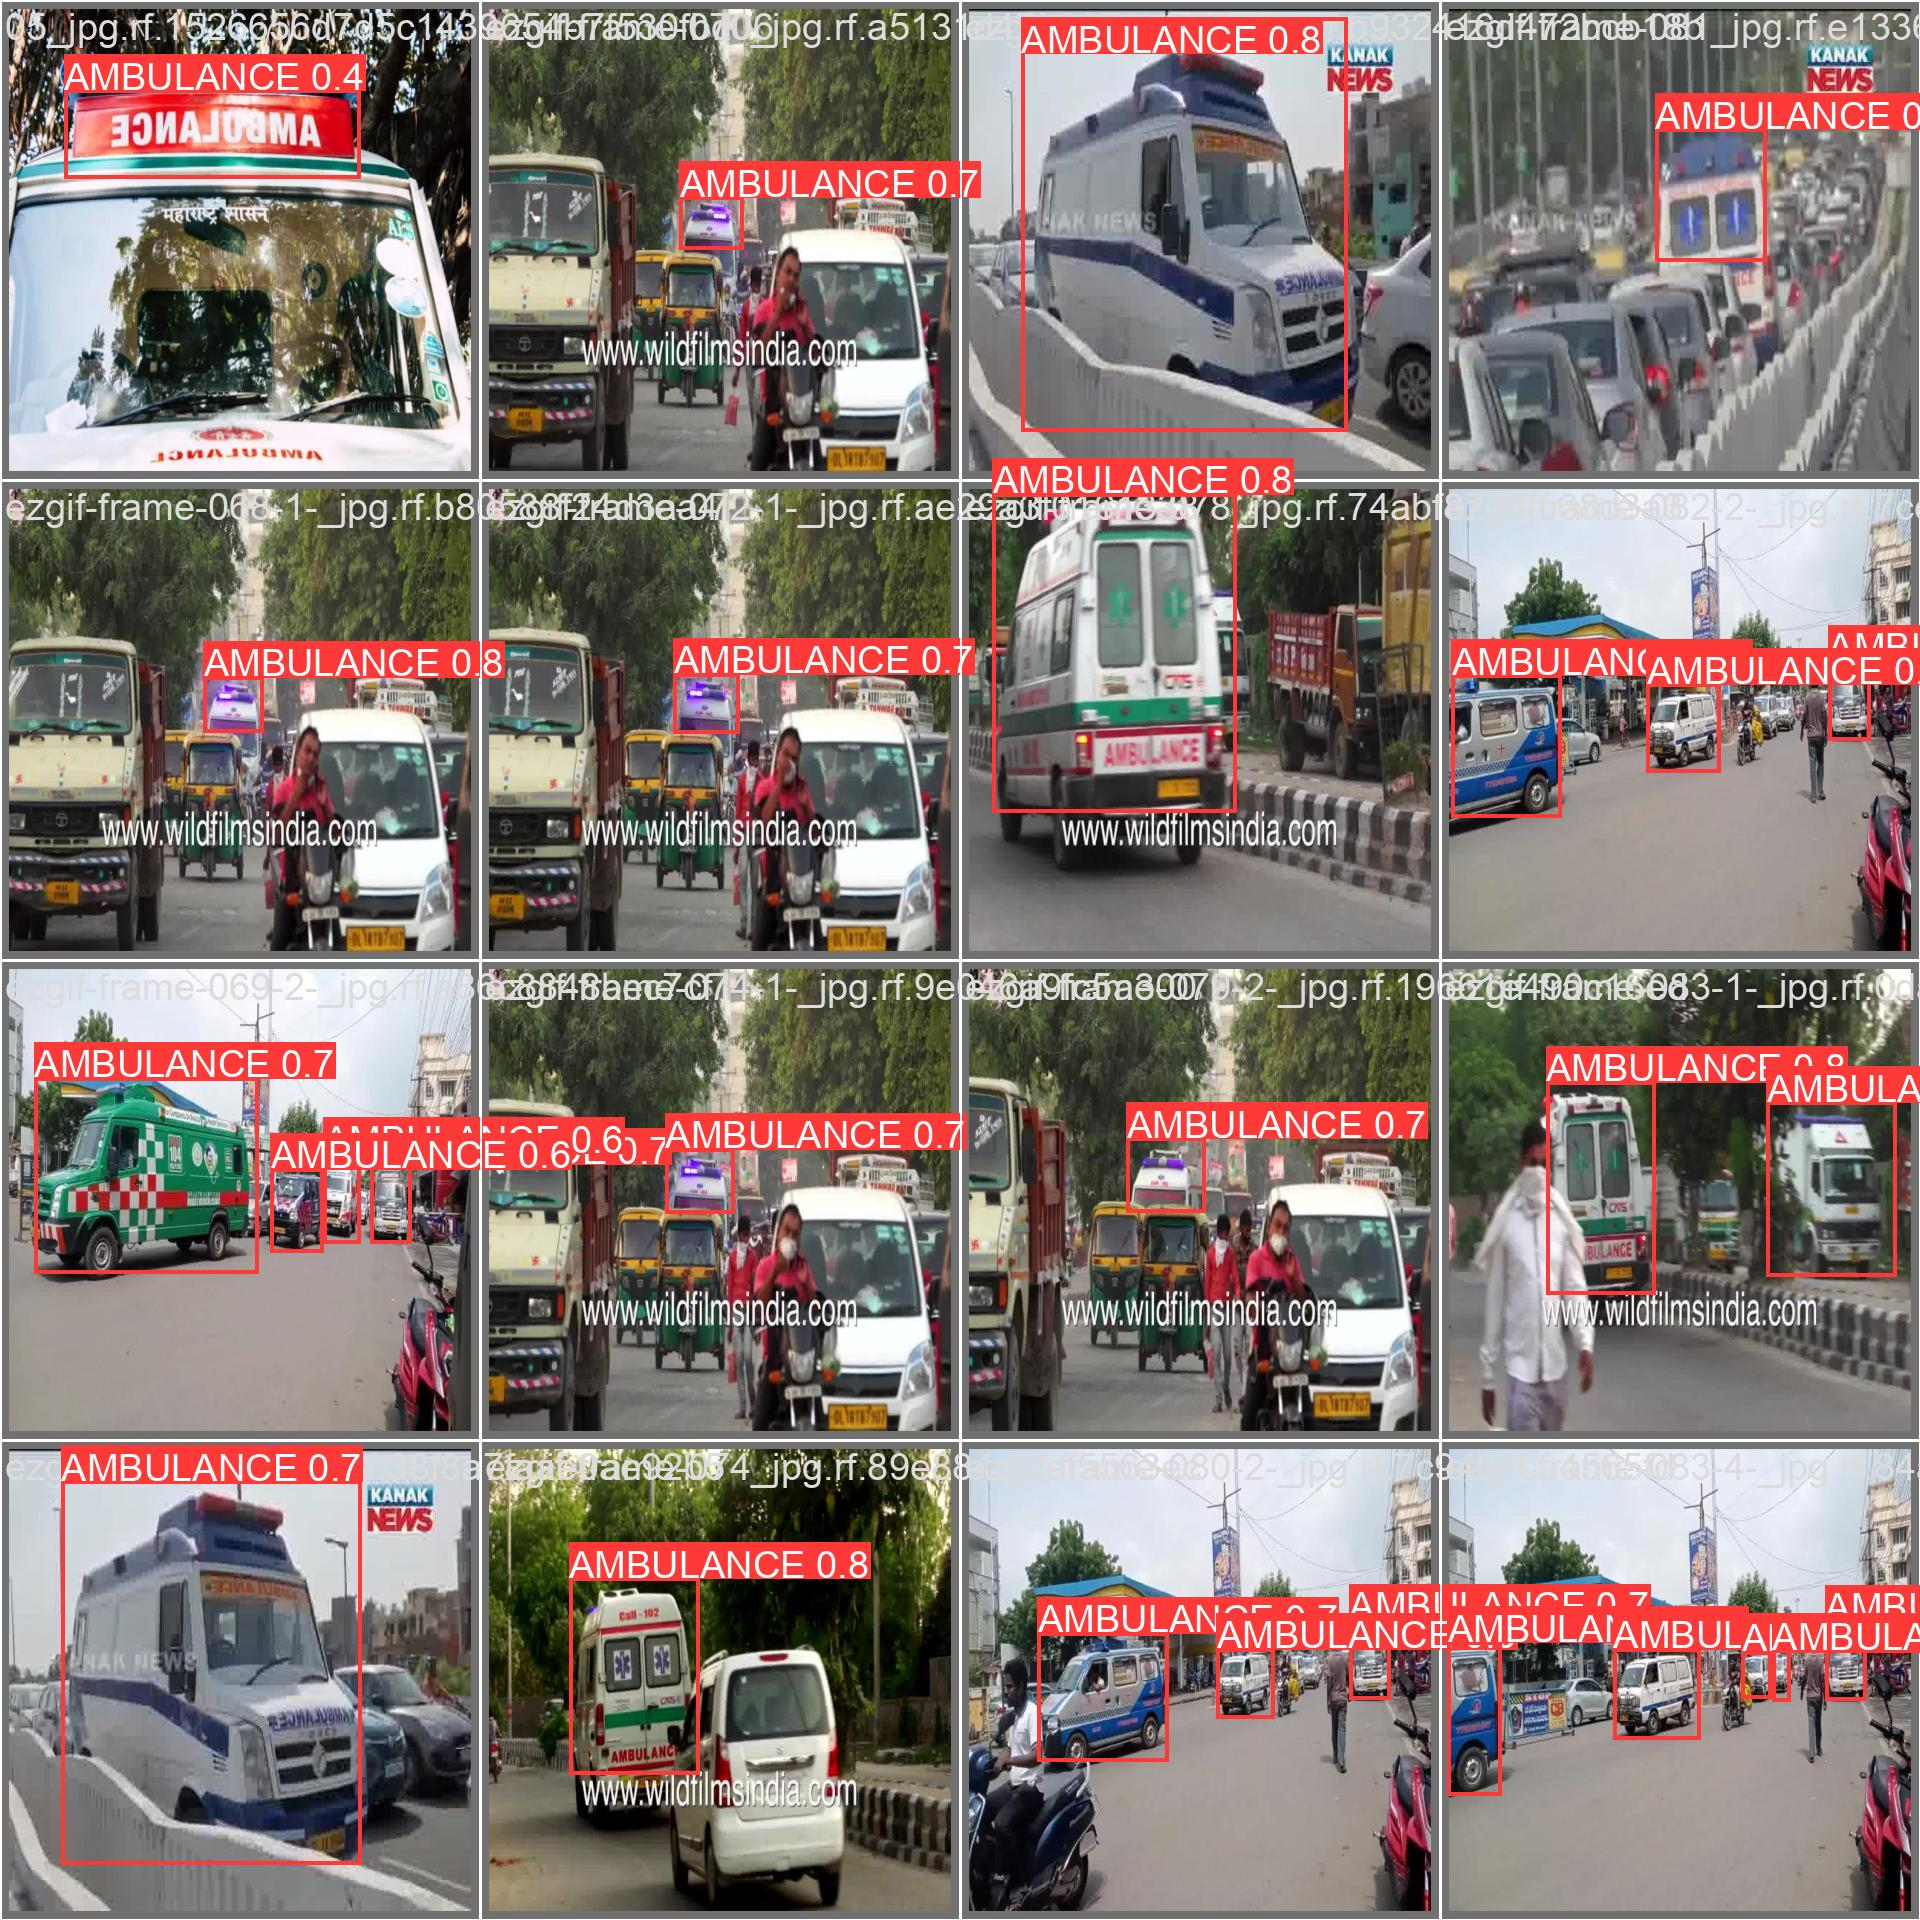

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Final-Year-Project-1/valid/labels.cache... 168 images, 1 backgrounds, 0 corrupt: 100% 168/168 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 225, len(boxes) = 254. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 11/11 [00:07<00:00,  1.50it/s]
                   all        168        254      0.714   

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/86 /content/Final-Year-Project-1/test/images/06_jpg.rf.f6871909084e5fc3a58509027737df6f.jpg: 800x800 1 AMBULANCE, 22.5ms
image 2/86 /content/Final-Year-Project-1/test/images/15_jpg.rf.3a752bdfa44ea93b118ad515f93f6582.jpg: 800x800 1 AMBULANCE, 22.6ms
image 3/86 /content/Final-Year-Project-1/test/images/18_16_11zon_jpg.rf.5f70b8967c4dfbe0ee72f76f5c48edb4.jpg: 800x800 1 AMBULANCE, 22.5ms
image 4/86 /content/Final-Year-Project-1/test/images/19_jpg.rf.5f9171243b2459ed896cfcce68bc3a61.jpg: 800x800 2 AMBULANCEs, 22.5ms
image 5/86 /content/Final-Year-Project-1/test/images/21_19_11zon_jpg.rf.4aa2e11e03ceb6df6aed6e62abee661a.jpg: 800x800 (no detections), 22.5ms
image 6/86 /content/Final-Year-Project-1/test/images/31_1_11zon_jpg.rf.b7b7b076e5c58b1918dead594052fe35.jpg: 800x800 1 AMBULANCE, 22.5ms
image 7/86 /cont

**Output code**

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/test4.mp4

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (1/568) /content/test4.mp4: 800x480 (no detections), 109.9ms
video 1/1 (2/568) /content/test4.mp4: 800x480 (no detections), 15.6ms
video 1/1 (3/568) /content/test4.mp4: 800x480 (no detections), 15.5ms
video 1/1 (4/568) /content/test4.mp4: 800x480 (no detections), 15.5ms
video 1/1 (5/568) /content/test4.mp4: 800x480 (no detections), 15.5ms
video 1/1 (6/568) /content/test4.mp4: 800x480 (no detections), 15.5ms
video 1/1 (7/568) /content/test4.mp4: 800x480 (no detections), 15.5ms
video 1/1 (8/568) /content/test4.mp4: 800x480 (no detections), 15.5ms
video 1/1 (9/568) /content/test4.mp4: 800x480 (no detections), 15.5ms
video 1/1 (10/568) /content/test4.mp4: 800x480 (no detections), 15.5ms
video 1/1 (11/568) /content/test4.mp4: 800x480 (no detections), 10.3ms
video 1/1 (12/568) /content/test4.mp4: 800x480 (no detect